## Rizal Wira Pambudi | 202331175
#### UTS PCD Kelas A

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

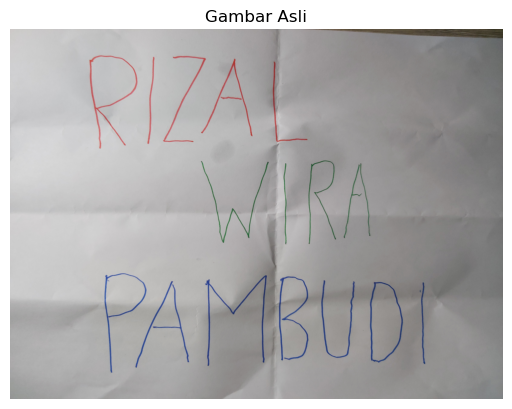

In [27]:
img = cv2.imread('warnanama2.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')
plt.show()


In [28]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [31]:
def buat_mask(hsv, lower, upper):
    return cv2.inRange(hsv, np.array(lower), np.array(upper))

In [33]:
lower_merah1 = [0, 120, 70]; upper_merah1 = [10, 255, 255]
lower_merah2 = [170, 120, 70]; upper_merah2 = [180, 255, 255]
mask_merah = buat_mask(img_hsv, lower_merah1, upper_merah1) + \
             buat_mask(img_hsv, lower_merah2, upper_merah2)

In [35]:
lower_hijau = [40, 40, 40]; upper_hijau = [70, 255, 255]
mask_hijau = buat_mask(img_hsv, lower_hijau, upper_hijau)

In [37]:
lower_biru = [100, 150, 0]; upper_biru = [140, 255, 255]
mask_biru = buat_mask(img_hsv, lower_biru, upper_biru)

In [39]:
merah_terdeteksi = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_merah)
hijau_terdeteksi = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_hijau)
biru_terdeteksi = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_biru)

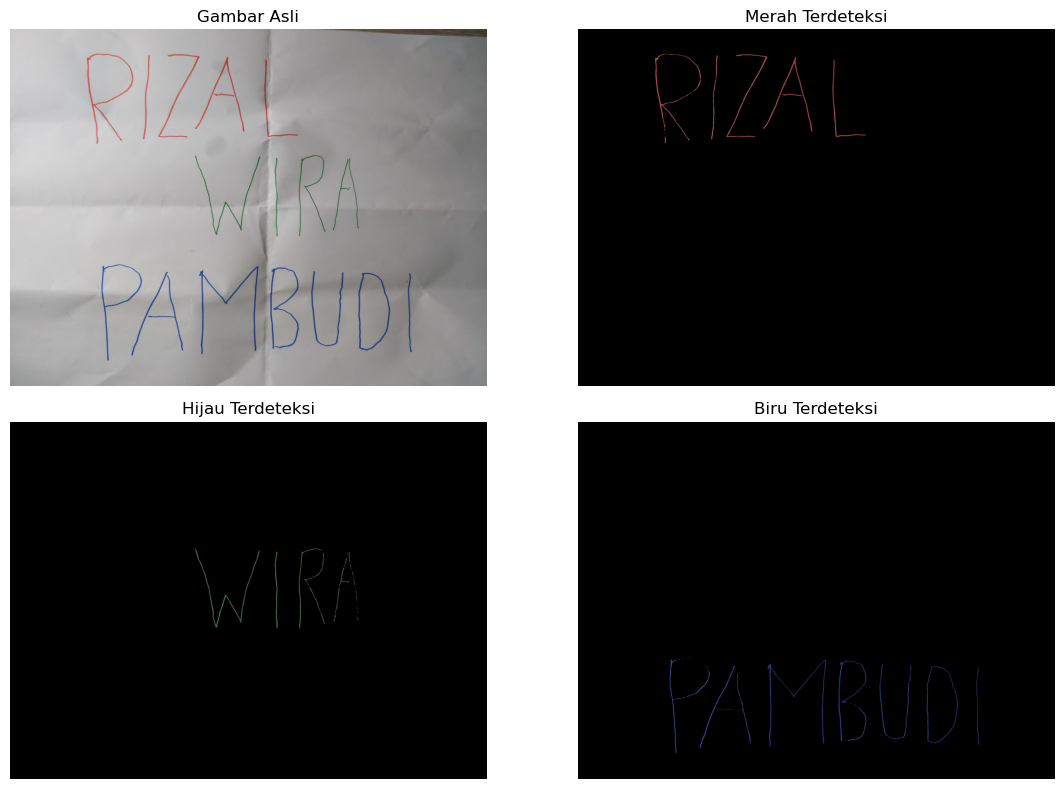

In [41]:
titles = ['Gambar Asli', 'Merah Terdeteksi', 'Hijau Terdeteksi', 'Biru Terdeteksi']
images = [img_rgb, merah_terdeteksi, hijau_terdeteksi, biru_terdeteksi]

plt.figure(figsize=(12, 8))
for i, (im, title) in enumerate(zip(images, titles), 1):
    plt.subplot(2, 2, i)
    plt.imshow(im)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [42]:
def plot_histogram(image, judul):
    plt.figure()
    channel_colors = ('r','g','b')
    for idx, col in enumerate(channel_colors):
        hist = cv2.calcHist([image], [idx], None, [256], [0,256])
        plt.plot(hist, color=col, label=f'Channel {col.upper()}')
    plt.title(judul)
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Pixel')
    plt.xlim([0,256])
    plt.legend()
    plt.show()

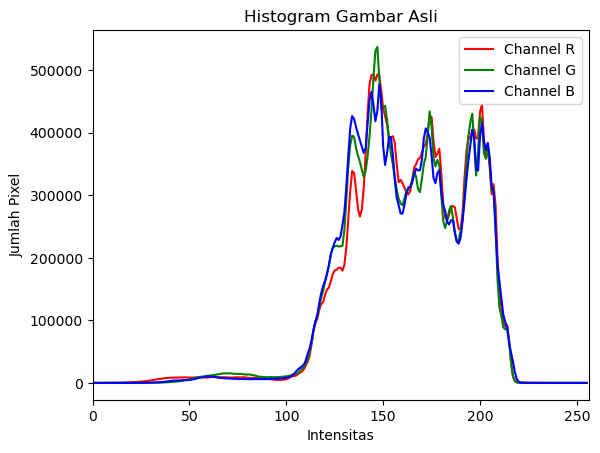

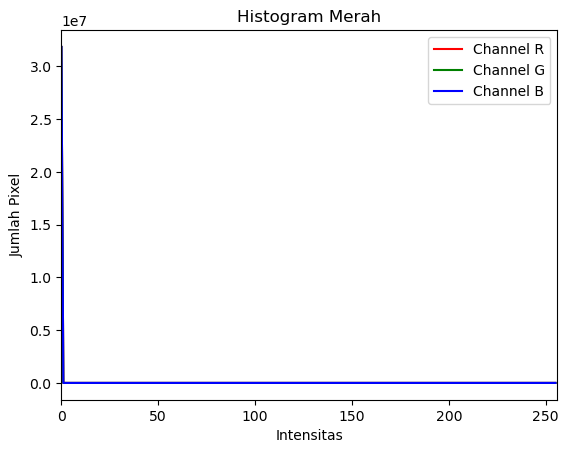

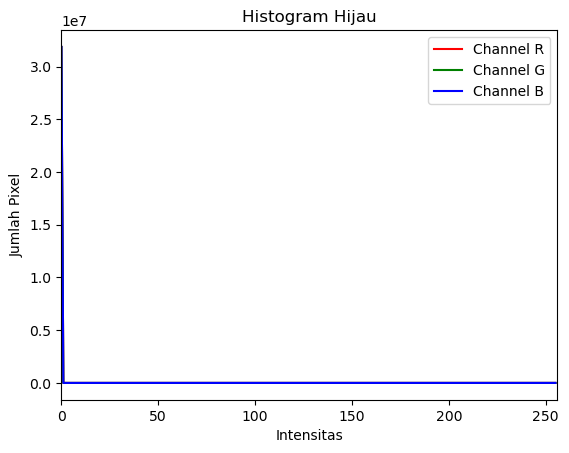

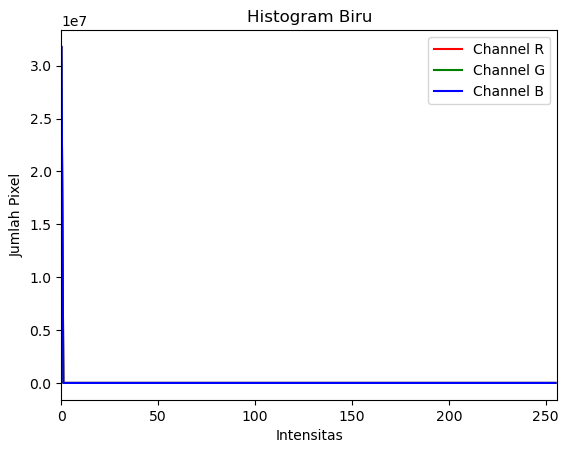

In [43]:
plot_histogram(img_rgb, 'Histogram Gambar Asli')
plot_histogram(merah_terdeteksi, 'Histogram Merah')
plot_histogram(hijau_terdeteksi, 'Histogram Hijau')
plot_histogram(biru_terdeteksi, 'Histogram Biru')